<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

## Create and visualize Data

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

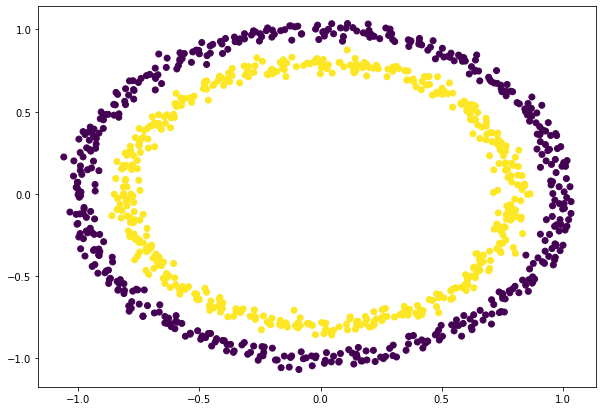

In [2]:
#Visualize with ah plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y)

## Split data


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## Modelling Experiments

In [14]:
def plot_training_curve(history):
  plt.figure(figsize=(10,7))
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss")
  plt.figure(figsize=(10,7))
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Accuracy")

### Model 1: Simple Dense

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(2,))
x = layers.Dense(1, activation="relu")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_0 = tf.keras.Model(inputs, outputs)

In [7]:
#Compile the model 
model_0.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [ ]:
#Fit the model 
history_model_0 = model_0.fit(x_train, y_train, 
                              epochs=100, 
                              validation_data=(x_test, y_test))

In [9]:
#Evaluate
model_0.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473612785339, 0.5]

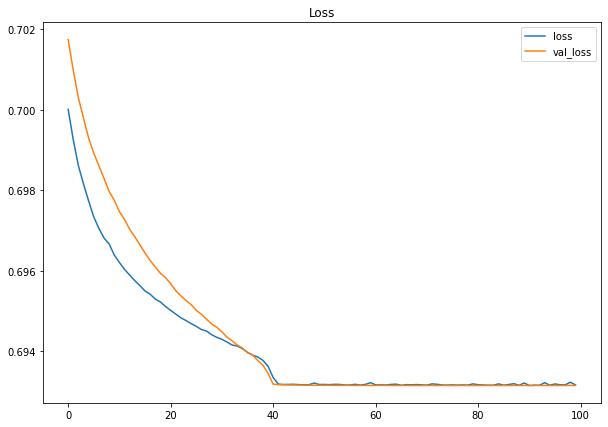

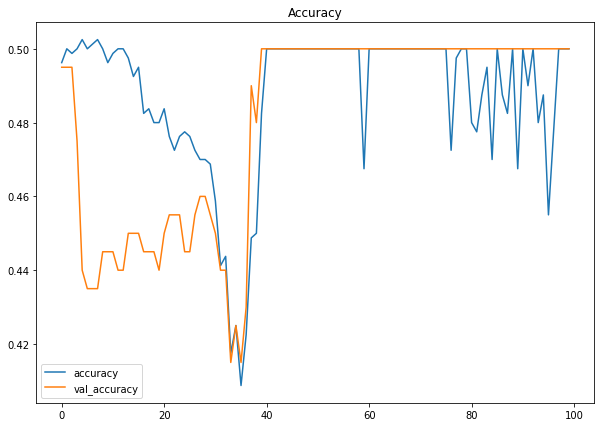

In [10]:
#Plot training curve
plot_training_curve(history_model_0)

### Model 1: Dense advanced

In [11]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(2,))
x = layers.Dense(6, activation="relu")(inputs)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [12]:
#Compile the model 
model_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [ ]:
#Fit the model 
history_model_1 = model_1.fit(x_train, y_train, 
                              epochs=140, 
                              validation_data=(x_test, y_test))

In [14]:
#Evaluate
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9950


[0.13206088542938232, 0.9950000047683716]

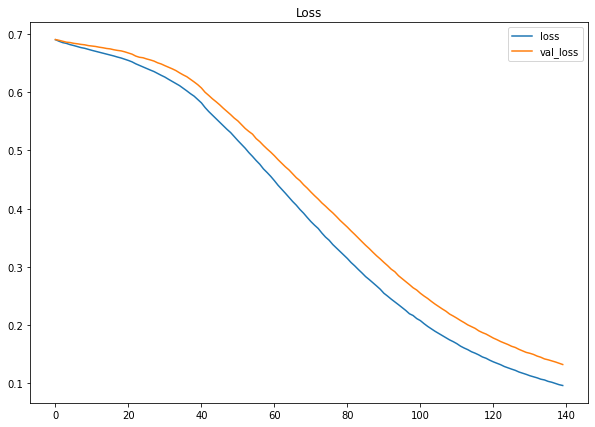

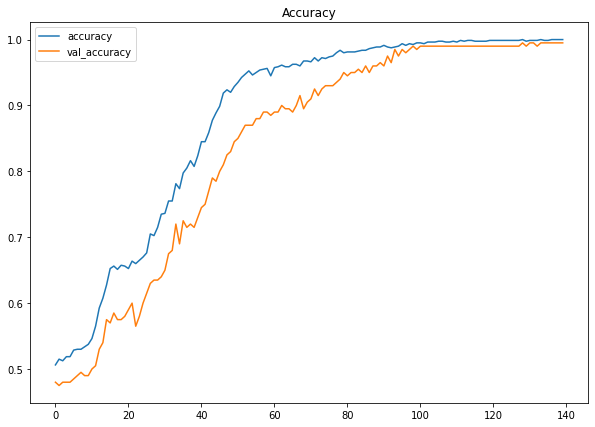

In [15]:
#Plot training curve
plot_training_curve(history_model_1)

# Multiclass Classification

## Download and visualize Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sandal')

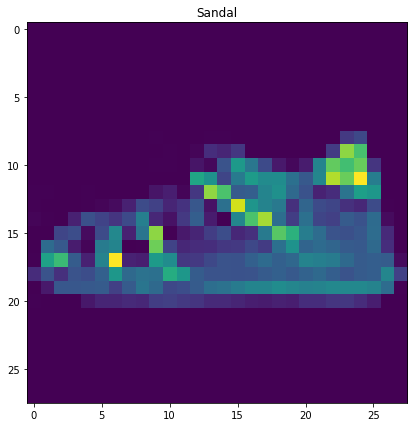

In [5]:
import random
import matplotlib.pyplot as plt

val = random.randint(0, len(x_train))
plt.figure(figsize=(10,7))
plt.imshow(x_train[val])
plt.title(class_names[y_train[val]])

## Prepare Data

In [6]:
#Check min and max values of training data
x_train.max(), x_train.min()

(255, 0)

In [7]:
# Get train and test data between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
#Check min and max values of training data after standardization
x_train.max(), x_train.min()

(1.0, 0.0)

## Modelling Experiments

### Model 0: Dense

In [26]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(28,28))
x = layers.Flatten()(inputs)
x = layers.Dense(6, activation="relu")(x)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model_0 = tf.keras.Model(inputs, outputs)

In [28]:
#Compile the model 
model_0.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#Fit the model 
history_model_0 = model_0.fit(x_train, y_train, 
            epochs=10,
            validation_data = (x_test,y_test))

In [34]:
#Evaluate
model_0.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.8095


[0.5527380108833313, 0.809499979019165]

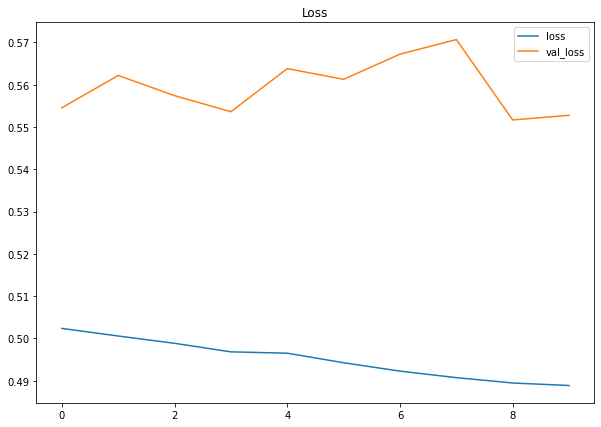

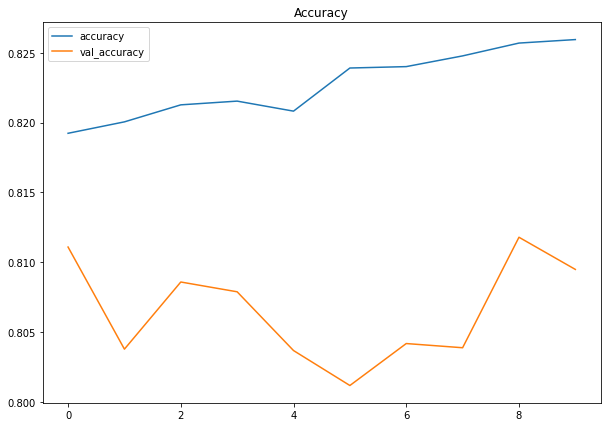

In [35]:
#Plot training curve
plot_training_curve(history_model_0)

### Model 1: Dense Advanced

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(28,28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [36]:
#Compile the model 
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [37]:
#Fit the model 
history_model_1 = model_1.fit(x_train, y_train, 
                              epochs=12,
                              validation_data = (x_test,y_test))

Epoch 1/12
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6788 - accuracy: 0.7607 - val_loss: 0.4522 - val_accuracy: 0.8359
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4654 - accuracy: 0.8372 - val_loss: 0.4413 - val_accuracy: 0.8430
Epoch 3/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4250 - accuracy: 0.8494 - val_loss: 0.3907 - val_accuracy: 0.8581
Epoch 4/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3998 - accuracy: 0.8577 - val_loss: 0.3832 - val_accuracy: 0.8610
Epoch 5/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3876 - accuracy: 0.8628 - val_loss: 0.3683 - val_accuracy: 0.8698
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3695 - accuracy: 0.8685 - val_loss: 0.3987 - val_accuracy: 0.8542
Epoch 7/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3619 - accuracy: 0.8696 - val_loss: 0.3723 - val_accuracy:

In [38]:
#Evaluate
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8723


[0.3579213321208954, 0.8723000288009644]

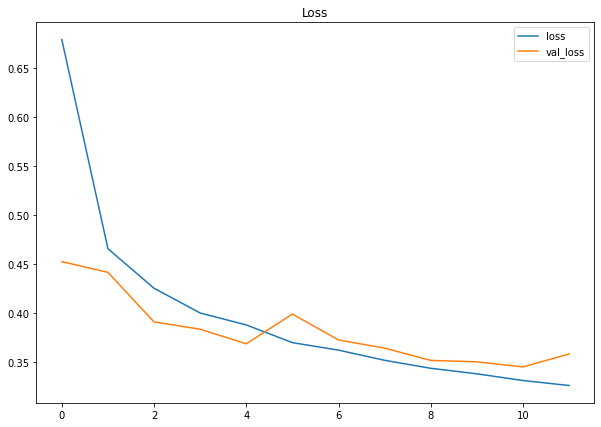

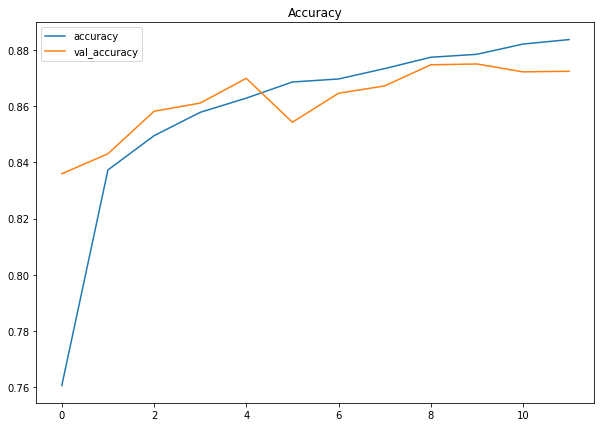

In [39]:
#Plot training curve
plot_training_curve(history_model_1)

### Model 2: CNN

In [86]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(28,28, 1))
x = layers.Conv2D(32, (3,3),padding="same", activation="relu")(inputs)
x = layers.Dropout(0.4)(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(len(class_names), "softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [87]:
#Compile the model 
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [88]:
#Fit the model 
history_model_2 = model_2.fit(x_train, y_train, 
                              epochs=100,
                              validation_data = (x_test,y_test),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])

Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4291 - accuracy: 0.8462 - val_loss: 0.4173 - val_accuracy: 0.8834
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3131 - accuracy: 0.8859 - val_loss: 0.4025 - val_accuracy: 0.8776
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2868 - accuracy: 0.8958 - val_loss: 0.3474 - val_accuracy: 0.8884
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2687 - accuracy: 0.9009 - val_loss: 0.3169 - val_accuracy: 0.9022
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2573 - accuracy: 0.9058 - val_loss: 0.3621 - val_accuracy: 0.8861
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2502 - accuracy: 0.9077 - val_loss: 0.3169 - val_accuracy: 0.8976
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2416 - accuracy: 0.9112 - val_loss: 0.2836 -

In [89]:
#Evaluate
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2544 - accuracy: 0.9182


[0.2543593645095825, 0.9182000160217285]

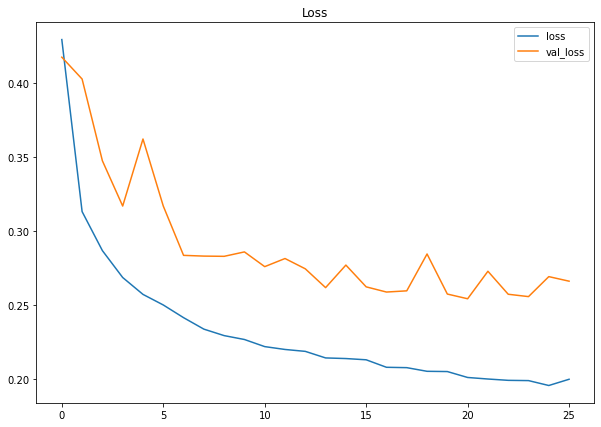

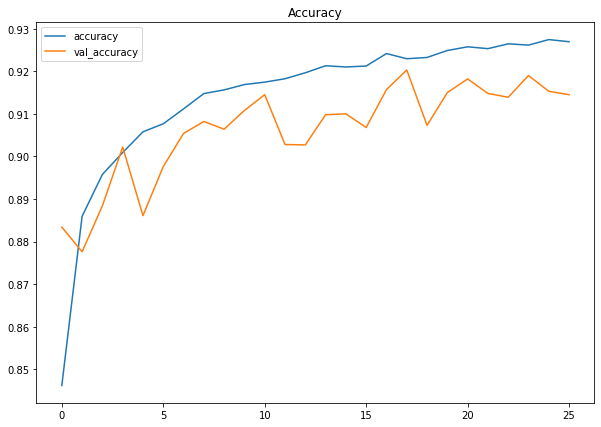

In [90]:
#Plot training curve
plot_training_curve(history_model_2)